In [1]:
# Import Dependencies
import pandas as pd
pd.options.mode.chained_assignment = None
from datetime import timedelta, date
import numpy as np
import matplotlib.pyplot as plt
import requests as requests
import time
from scipy import stats 
#import linregress
import json

In [2]:
#CDC COVID-19 vaccination in the US url
vax_url = "https://data.cdc.gov/resource/8xkx-amqh"

In [3]:
#request API and get json objects

# vax_response = requests.get(vax_url).json()
# vax_response

In [4]:
# len(vax_response)

In [5]:
# vax_url = "https://data.cdc.gov/resource/8xkx-amqh"
# #request API and get json objects

# # vax_response = requests.get(vax_url).json()
# # vax_response

# df=pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$limit=25000")
# ##df=pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$where=date_extract_y(date)<2021&$limit=25000")


In [6]:
# vax_response = requests.get("https://data.cdc.gov/resource/8xkx-amqh.json?$where="
#                   "(date_extract_y(date)%20%3C=%202021%20AND%20date_extract_m(date)%20%3C=9)")
# vax_response_json=vax_response.json()

In [7]:
# # increasing the data rows to be pulled to a count
# df = pd.read_json("https://data.cdc.gov/resource/8xkx-amqh.json?$where="
#                  "(date_extract_y(date)%20%3C=%202021%20AND%20date_extract_m(date)%20%3C=9)&$limit=25000")

In [8]:
#df.info()

In [9]:
#new_df=df[["date","recip_county"]]


In [10]:
#new_df.head()

In [11]:
#CDC COVID-19 mortality rate in the US by age and sex url
mort_url = "https://data.cdc.gov/resource/9bhg-hcku"

In [12]:
#Data frame of the CDC COVID-19 mortality rate in the US by age and sex as of 09/30/2021
#df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$where="
#                  "(date_extract_y(end_date)%20%3C=%202021%20AND%20date_extract_m(end_date)%20%3C=9)&$limit=500000")

In [13]:
df_mort = pd.read_json("https://data.cdc.gov/resource/9bhg-hcku.json?$limit=1000000")
                

In [14]:
len(df_mort)

68850

In [15]:
# Displaying one record 
df_mort.iloc[500]

data_as_of                                                 2021-10-20T00:00:00.000
start_date                                                 2020-01-01T00:00:00.000
end_date                                                   2021-10-16T00:00:00.000
group                                                                     By Total
state                                                         District of Columbia
sex                                                                         Female
age_group                                                              25-34 years
covid_19_deaths                                                                NaN
total_deaths                                                                 116.0
pneumonia_deaths                                                              10.0
pneumonia_and_covid_19_deaths                                                  NaN
influenza_deaths                                                               0.0
pneu

In [16]:
#data frame with required fields
new_df=df_mort[["group","year","month","state","sex","age_group","covid_19_deaths",
                "total_deaths"]]
pd.options.display.float_format = "{:.0f}".format

In [17]:
new_df

,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,By Total,NaN,NaN,United States,All Sexes,All Ages,723880,5928410
1,By Total,NaN,NaN,United States,All Sexes,Under 1 year,132,33432
2,By Total,NaN,NaN,United States,All Sexes,0-17 years,542,59268
3,By Total,NaN,NaN,United States,All Sexes,1-4 years,63,6236
4,By Total,NaN,NaN,United States,All Sexes,5-14 years,172,9911
...,...,...,...,...,...,...,...,...
68845,By Month,2021,10,Puerto Rico,Female,50-64 years,NaN,21
68846,By Month,2021,10,Puerto Rico,Female,55-64 years,NaN,17
68847,By Month,2021,10,Puerto Rico,Female,65-74 years,NaN,19
68848,By Month,2021,10,Puerto Rico,Female,75-84 years,NaN,29


In [18]:
new_df.drop(new_df.loc[(new_df["month"] == 10)&(new_df["year"] == 2021)].index, inplace=True)

In [45]:
#Dropping data for age_groups -"Under 1 year", "1-4 years", "All Ages","5-14 years","15-24 years"
# and "25-34 years" , "35-44 years",  "45-54 years",  "55-64 years"

new_df.drop(new_df.loc[new_df["age_group"]=="Under 1 year"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="1-4 years"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="All Ages"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="5-14 years"].index, inplace=True)

new_df.drop(new_df.loc[new_df["age_group"]=="15-24 years"].index, inplace=True)


new_df.drop(new_df.loc[new_df["age_group"]=="25-34 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="35-44 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["age_group"]=="45-54 years"].index, inplace=True) 
new_df.drop(new_df.loc[new_df["age_group"]=="55-64 years"].index, inplace=True)
new_df.drop(new_df.loc[new_df["state"]=="United States"].index, inplace=True)
new_df.drop(new_df.loc[new_df["sex"]=="All Sexes"].index, inplace=True)



In [46]:
new_df["age_group"].unique()

array(['0-17 years', '18-29 years', '30-39 years', '40-49 years',
       '50-64 years', '65-74 years', '75-84 years', '85 years and over'],
      dtype=object)

In [47]:
new_df.reset_index()

,index,group,year,month,state,sex,age_group,covid_19_deaths,total_deaths
0,70,By Total,NaN,NaN,Alabama,Male,0-17 years,NaN,786
1,74,By Total,NaN,NaN,Alabama,Male,18-29 years,57,1593
2,76,By Total,NaN,NaN,Alabama,Male,30-39 years,171,2081
3,78,By Total,NaN,NaN,Alabama,Male,40-49 years,418,3363
4,80,By Total,NaN,NaN,Alabama,Male,50-64 years,1800,13151
...,...,...,...,...,...,...,...,...,...
20347,68792,By Month,2021,9,Puerto Rico,Female,40-49 years,NaN,27
20348,68794,By Month,2021,9,Puerto Rico,Female,50-64 years,30,124
20349,68796,By Month,2021,9,Puerto Rico,Female,65-74 years,25,180
20350,68797,By Month,2021,9,Puerto Rico,Female,75-84 years,27,297


In [48]:
# Mortality rate Vs Gender  - Data for Pie Chart
gender_df=new_df.groupby(by=["sex"]).sum()
gender_df = gender_df.drop("year",1)
gender_df = gender_df.drop("month",1)
update_df = gender_df.drop('All Sexes')



KeyError: "['All Sexes'] not found in axis"

In [49]:
update_df

,covid_19_deaths,total_deaths
sex,,
Female,965456,8470478
Male,1187454,9426288


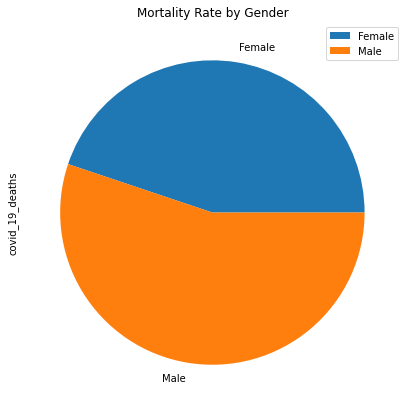

In [50]:
labels = "Females", "Male"
sizes=update_df["covid_19_deaths"]
#plt.pie(sizes,labels=labels);
#plt.title("Mortality Rate by Gender");
#plt.show()
plot = update_df.plot.pie(y='covid_19_deaths', figsize=(7, 7), title="Mortality Rate by Gender")
plt.savefig("/Users/karlarobles/Desktop/DataViz/DataViz/Project-1-MKFG/mkfg_figures/Mortalityratebygender.png")
        

In [51]:
#Mortality rate by age group - Data for scatter plot

age_group_df=new_df.groupby(by=["age_group"]).sum()

age_group_df = age_group_df.drop("year",1)
age_group_df = age_group_df.drop("month",1)
#age_group_df.drop(age_group_df.loc[age_group_df["sex"]=="All Sexes"].index, inplace=True)
covid_19_deaths_sum = age_group_df["covid_19_deaths"].sum()
total_deaths_sum = age_group_df["total_deaths"]

covid_19_deaths_sum = age_group_df["covid_19_deaths"].sum()

age_group_df

,covid_19_deaths,total_deaths
age_group,,
0-17 years,433,175453
18-29 years,9258,338779
30-39 years,31247,492755
40-49 years,83045,738710
50-64 years,384367,3015471
65-74 years,488149,3638856
75-84 years,568098,4330232
85 years and over,588313,5166510


<ipython-input-65-158a5e292102>:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y =age_group_df["covid_19_deaths"].astype(np.float).to_list()


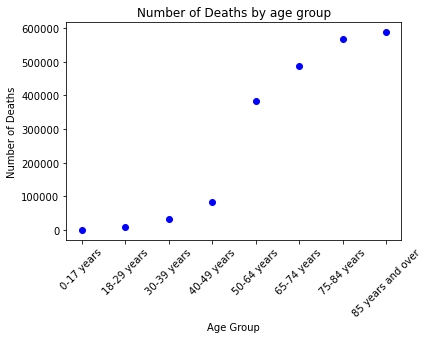

TypeError: cannot perform reduce with flexible type

<Figure size 432x288 with 0 Axes>

In [65]:
#Mortality rate by age group - Data for scatter plot

x =age_group_df.index.tolist()
y =age_group_df["covid_19_deaths"].astype(np.float).to_list()

plt.plot(x, y, 'o', color='blue');

plt.xticks(rotation = 45) 
plt.ylabel("Number of Deaths")
plt.xlabel("Age Group")
plt.title("Number of Deaths by age group")
# Show graphic
plt.show()
plt.savefig("/Users/karlarobles/Desktop/DataViz/DataViz/Project-1-MKFG/mkfg_figures/Numberofdeathsbyagegroupscatter.png")

#(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x, y)

# Repeat plotting scatter and linear model for year versus murder rate
y = age_group_df["covid_19_deaths"]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
m_fit = m_slope * x + m_int
plt.scatter(x, y)
plt.plot(x,m_fit,"--")
plt.xticks(x, rotation=90)
plt.xlabel('age_group_df')
plt.ylabel('')
plt.show()

# Get regression values
regress_values = x * slope + intercept
print(regress_values)

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(line_eq)

plt.plot(x,regress_values,"r-")




In [68]:
x =age_group_df.index.tolist()
y =age_group_df["covid_19_deaths"].astype(float).to_list()


y = age_group_df["covid_19_deaths"]
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(x, y)
m_fit = m_slope * x + m_int
plt.scatter(x, y)
plt.plot(x,m_fit,"--")
plt.xticks(x, rotation=90)
plt.xlabel('age_group_df')
plt.ylabel('jgk')
plt.show()

TypeError: cannot perform reduce with flexible type

In [27]:
#Mortality By state - Data horizontal bar graph
state_df=new_df.groupby(by=["state"]).sum()
state_df.loc['New York'] += state_df.loc['New York City']
state_df.drop(['New York City'], inplace=True)
state_df = state_df.drop("year",1)
state_df = state_df.drop("month",1)


In [28]:
state_df

,covid_19_deaths,total_deaths
state,,
Alabama,88481,684236
Alaska,3082,51557
Arizona,110218,824386
Arkansas,49314,407525
California,442371,3433364
Colorado,48608,494390
Connecticut,51323,370633
Delaware,11062,114545
District of Columbia,8663,75839


In [29]:
sorted_state_df= state_df.sort_values("covid_19_deaths",ascending=False)

In [30]:
# Mortlaity by State counts sorted in descending order
sorted_state_df["covid_19_deaths"]

state
California             442371
Texas                  434710
New York               343160
Florida                337012
Pennsylvania           185160
Ohio                   158358
New Jersey             154747
Illinois               147901
Georgia                145043
Michigan               119734
North Carolina         114993
Arizona                110218
Tennessee              108807
Indiana                 94595
Alabama                 88481
Missouri                87019
Massachusetts           85105
Virginia                78301
South Carolina          76673
Louisiana               75876
Maryland                67194
Oklahoma                65330
Kentucky                61035
Mississippi             60309
Wisconsin               56051
Connecticut             51323
Minnesota               50197
Arkansas                49314
Colorado                48608
Washington              46020
Nevada                  45541
Iowa                    40605
Kansas                  35826
New 

In [31]:
sorted_state_df.iloc[0:5]
top5states_df=sorted_state_df.head()


<ipython-input-32-e12c49cf0655>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=plt.subplot()


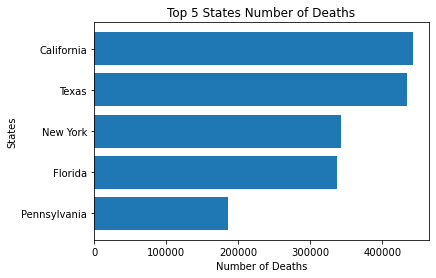

<Figure size 432x288 with 0 Axes>

In [32]:
#height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:10].to_string(index=False,header=False)
height=sorted_state_df["covid_19_deaths"].astype(int).iloc[0:5].to_list()
bars=sorted_state_df.index.tolist()[0:5]
y_pos = np.arange(len(bars))
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
ax=plt.subplot()
ax.invert_yaxis() 
# Show graphic
plt.ylabel("States")
plt.xlabel("Number of Deaths")
plt.title("Top 5 States Number of Deaths")
plt.show()

#plot = update_df.plt.barh(y='covid_19_deaths', figsize=(7, 7), title="Mortlaity by State counts sorted in descending order")
plt.savefig("/Users/karlarobles/Desktop/DataViz/DataViz/Project-1-MKFG/mkfg_figures/Mortalityratebystate.png")
        

In [33]:
#Mortality rate for Gender types for different age groups - Stacked bar graph

gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
gender_agegroup_df = gender_agegroup_df.drop("year",1)
gender_agegroup_df = gender_agegroup_df.drop("month",1)

In [34]:
gender_agegroup_df

covid_19_deaths  total_deaths
sex       age_group                                       
All Sexes 0-17 years                     823        177685
          18-29 years                  10278        340850
          30-39 years                  33091        494339
          40-49 years                  85472        739544
          50-64 years                 385891       3015471
          65-74 years                 489493       3638856
          75-84 years                 569357       4330232
          85 years and over           589647       5166510
Female    0-17 years                     156         72457
          18-29 years                   3446         89825
          30-39 years                  11248        157522
          40-49 years                  29268        267318
          50-64 years                 142012       1152828
          65-74 years                 194549       1525645
          75-84 years                 249029       2069538
          85 years and over           335748       3135345
Male      0-17 years                     277        102996
          18-29 years                   5812        248954
          30-39 years                  19999        335233
          40-49 years                  53777        471392
          50-64 years                 242355       1862643
          65-74 years                 293600       2113211
          75-84 years                 319069       2260694
          85 years and over           252565       2031165

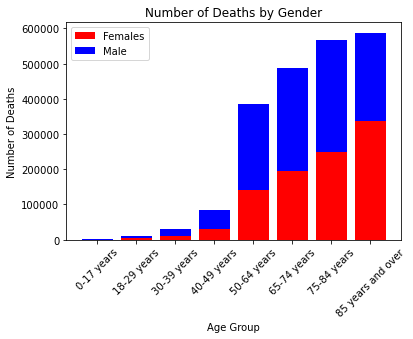

<Figure size 432x288 with 0 Axes>

In [59]:
#Mortality rate by age group - Data for stack bars

x=gender_agegroup_df.xs('Female',level='sex').index.to_list()
y1=gender_agegroup_df.xs('Female',level='sex')["covid_19_deaths"].astype(int).to_list()
y2=gender_agegroup_df.xs('Male',level='sex')["covid_19_deaths"].astype(int).to_list()

# plot bars in stack manner
plt.bar(x, y1, color='r')
plt.bar(x, y2, bottom=y1, color='b')
plt.xticks(rotation = 45)

plt.ylabel("Number of Deaths")
plt.xlabel("Age Group")
plt.title("Number of Deaths by Gender")
# Show graphic
#plt.legend([])
plt.legend(labels,loc='upper left')
plt.show()
plt.savefig("/Users/karlarobles/Desktop/DataViz/DataViz/Project-1-MKFG/mkfg_figures/NumberofdeathsStackBar.png")



In [36]:
#Mortality total count per year 

Year_group_df=new_df.groupby(by=["year"]).sum()

Year_group_df

,month,covid_19_deaths,total_deaths
year,,,
2020,99216,1533421,13676444
2021,57240,1330246,10153193


In [37]:
#Mortality rate for Year for different age groups 

Year_Month_df=new_df.groupby(by=["year","month"]).sum()
#gender_agegroup_df=new_df.groupby(by=["sex","age_group"]).sum()
Year_Month_df


covid_19_deaths  total_deaths
year month                               
2020 1                    0        534071
     2                    0        494229
     3                12928        544443
     4               129818        648937
     5                75311        565370
     6                34679        505098
     7                60952        562708
     8                58764        559735
     9                37396        518992
     10               48879        552514
     11              105768        609972
     12              195938        739492
2021 1               209829        751658
     2                95676        568798
     3                44865        545898
     4                36009        517512
     5                28244        518080
     6                13963        486400
     7                20208        505190
     8                92860        584262
     9               109212        545689

In [38]:
Year_Month_df["covid_19_deaths"]

year  month
2020  1            0
      2            0
      3        12928
      4       129818
      5        75311
      6        34679
      7        60952
      8        58764
      9        37396
      10       48879
      11      105768
      12      195938
2021  1       209829
      2        95676
      3        44865
      4        36009
      5        28244
      6        13963
      7        20208
      8        92860
      9       109212
Name: covid_19_deaths, dtype: float64